## Análisis de test A/B

Soy analista en una gran tienda en línea. 

Junto con el departamento de marketing hemos recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tenemos que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
hypotheses_us = pd.read_csv ('/datasets/hypotheses_us.csv', sep =';')
orders_us = pd.read_csv('/datasets/orders_us.csv')
visits_us = pd.read_csv('/datasets/visits_us.csv')

### Priorizar hipótesis

In [3]:
pd.set_option('display.max_colwidth', None)
hypotheses_us

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

#### Aplicar el framework ICE para priorizar hipótesis.

In [4]:
hypotheses_us['ICE'] = (hypotheses_us['Impact'] * hypotheses_us['Confidence']) / hypotheses_us['Effort']
hypotheses_us['ICE'] = hypotheses_us['ICE'].round(2)
hypotheses_us[['Hypothesis','ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00
1,Launch your own delivery service. This will shorten delivery time,2.00
5,Add a customer review page. This will increase the number of orders,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.12
4,Change the background color on the main page. This will increase user engagement,1.00


#### Aplicar el framework RICE para priorizar hipótesis. 

In [5]:
hypotheses_us['RICE'] = (hypotheses_us['Reach']*hypotheses_us['Impact']*hypotheses_us['Confidence'])/hypotheses_us['Effort']
hypotheses_us[['Hypothesis','RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


#### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE.

In [6]:
sorted_by_RICE = hypotheses_us[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False)
sorted_by_ICE = hypotheses_us[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)
sorted_hypotheses = pd.concat([sorted_by_RICE.reset_index(drop=True), sorted_by_ICE.reset_index(drop=True)], axis=1)
sorted_hypotheses

,Hypothesis,RICE,Hypothesis,ICE
0,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0,Launch a promotion that gives users discounts on their birthdays,16.20
1,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0,Add two new channels for attracting traffic. This will bring 30% more users,13.33
2,Add two new channels for attracting traffic. This will bring 30% more users,40.0,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20
3,Show banners with current offers and sales on the main page. This will boost conversion,40.0,Show banners with current offers and sales on the main page. This will boost conversion,8.00
4,Launch a promotion that gives users discounts on their birthdays,16.2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00
5,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0,Launch your own delivery service. This will shorten delivery time,2.00
6,Launch your own delivery service. This will shorten delivery time,4.0,Add a customer review page. This will increase the number of orders,1.33
7,Add a customer review page. This will increase the number of orders,4.0,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.12
8,Change the background color on the main page. This will increase user engagement,3.0,Change the background color on the main page. This will increase user engagement,1.00


RICE toma en cuenta cuántos usuarios se verán afectados por la actualización que se quiere introducir, tiene una prioridad diferente a la del ICE.

La Hipotesis "Add a subscription form to all the main pages. This will help you compile a mailing list" aparece en los primeros lugares en ambas evaluaciones.


### Análisis de test A/B

Realizamos un test A/B y obtuvimos los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

In [7]:
orders_us.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
visits_us.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Vamos a verificar si algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B. 

Analizaremos que tanto nos afectaria eliminarlos.


In [9]:
visitor_A = set(orders_us[orders_us['group'] == 'A']['visitorId'])
visitor_B = set(orders_us[orders_us['group'] == 'B']['visitorId'])
visitors_in_both_groups = list(visitor_A & visitor_B)
len(visitors_in_both_groups)

58

In [10]:
percentage_affected = (len(visitors_in_both_groups) / len(orders_us['visitorId'].unique())) * 100

print(f"Porcentaje de Afectación al eliminar visitors_in_both_groups: {percentage_affected:.2f}%")


Porcentaje de Afectación al eliminar visitors_in_both_groups: 5.63%


Eliminaremos los visitantes que pertenecen a ambos grupos pues representa un  pocentae muy pequeño. Por lo tanto, mantener estos visitantes puede afectar la validez de nuestras conclusiones.

In [11]:
orders_us = orders_us[~orders_us['visitorId'].isin(visitors_in_both_groups)]

#### Representa gráficamente el ingreso acumulado por grupo.

Convertiremos las columnas de fecha al formato adecuado.

In [12]:
orders_us['date'] = orders_us['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits_us['date'] = visits_us['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Eliminaré los duplicados para construir un DF con valores únicos en fecha-grupo.

In [13]:
date_group = orders_us[['date','group']].drop_duplicates()

In [14]:
orders_dt = date_group \
.apply(lambda x: orders_us[np.logical_and(orders_us['date'] <= x['date'], orders_us['group'] == x['group'])] \
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1) \
.sort_values(by=['date','group'])

In [15]:
visits_dt = date_group \
.apply(lambda x: visits_us[np.logical_and(visits_us['date'] <= x['date'], visits_us['group'] == x['group'])] \
.agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1) \
.sort_values(by=['date','group'])

Se crea el df con datos por grupo.

In [16]:
accumulated_by_group = orders_dt.merge(visits_dt, left_on=['date', 'group'], right_on=['date', 'group'])
accumulated_by_group.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

accumulated_by_group.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


Ahora vamos a graficar la tabla: accumulated_by_group. Dividida por el revenuede cada grupo por el paso de las fechas.

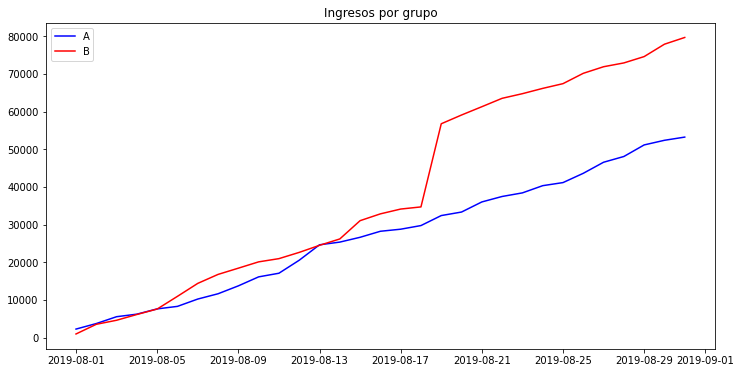

In [17]:
revenue_a = accumulated_by_group[accumulated_by_group['group']=='A'][['date','revenue', 'orders']]
revenue_b = accumulated_by_group[accumulated_by_group['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12,6)) 
plt.plot(revenue_a['date'], revenue_a['revenue'], label='A', color='blue'); 
plt.plot(revenue_b['date'], revenue_b['revenue'], label='B', color='red');
plt.title('Ingresos por grupo')
plt.legend();

##### Conclusiones:

Los ingresos aumentan de forma constante durante la prueba. 
Tienen una dinámica similar pero el grupo B auemnta exponencialmente después de 2019-08-17 superior al grupo A.

#### Representa gráficamente el tamaño de pedido promedio acumulado por grupo.

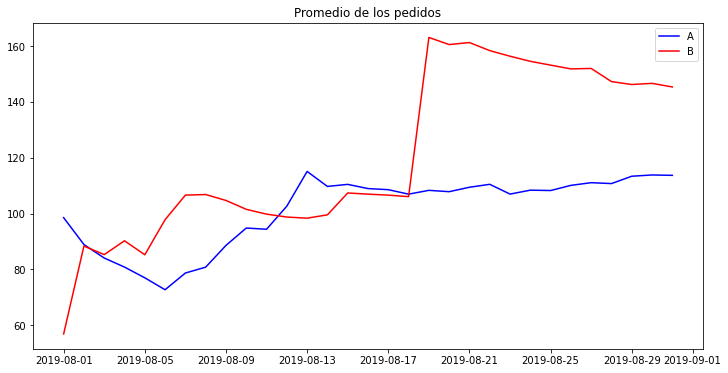

In [18]:
plt.figure(figsize=(12,6))
plt.plot(revenue_a['date'], revenue_a['revenue']/revenue_a['orders'], label='A', color='blue')
plt.plot(revenue_b['date'], revenue_b['revenue']/revenue_b['orders'], label='B', color='red')

plt.title('Promedio de los pedidos')
plt.legend();

##### Conclusiones:

El tamaño medio de los pedidos está aumentando en los dos grupos, el grupo B tiene un crecimiento en 2019-08-17 y no lo logra mantener o superar.

#### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

In [19]:
merged_revenue = revenue_a.merge(revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


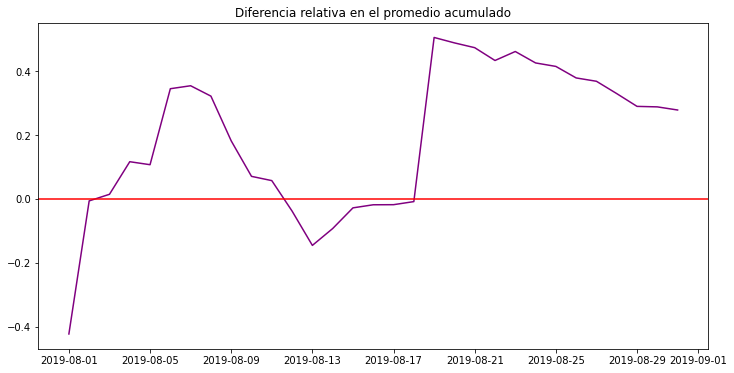

In [20]:
plt.figure(figsize=(12,6))
plt.plot(
    merged_revenue['date'], 
    (merged_revenue['revenueB']/merged_revenue['ordersB'])
    /(merged_revenue['revenueA']/merged_revenue['ordersA'])-1, 
    color='purple')
plt.title('Diferencia relativa en el promedio acumulado')
plt.axhline(y=0, color='red', linestyle='-');

##### Conclusión. 
No existe tendencia, la grafica muestra volatilidad. La razón podrían debe serla variabilidad del tamaño de los pedidos o valores atípicos.

#### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. 

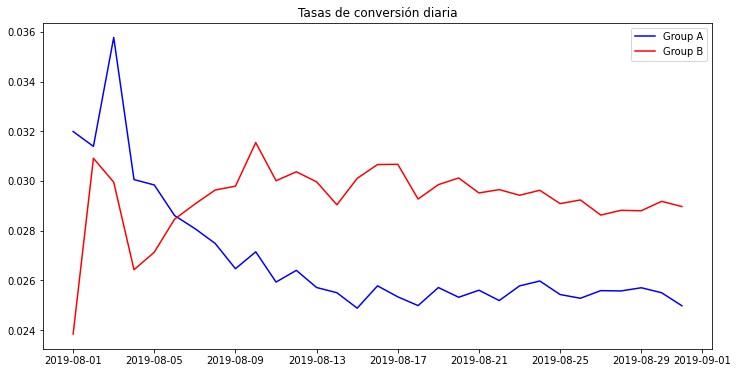

In [21]:
accumulated_by_group['conversion'] = accumulated_by_group['orders']/accumulated_by_group['visitors']
accumulated_a = accumulated_by_group[accumulated_by_group['group']=='A']
accumulated_b = accumulated_by_group[accumulated_by_group['group']=='B']

plt.figure(figsize=(12,6)) 
plt.title('Tasas de conversión diaria')
plt.plot(accumulated_a['date'], accumulated_a['conversion'], label='Group A', color='blue')
plt.plot(accumulated_b['date'], accumulated_b['conversion'], label='Group B', color='red')
plt.legend();

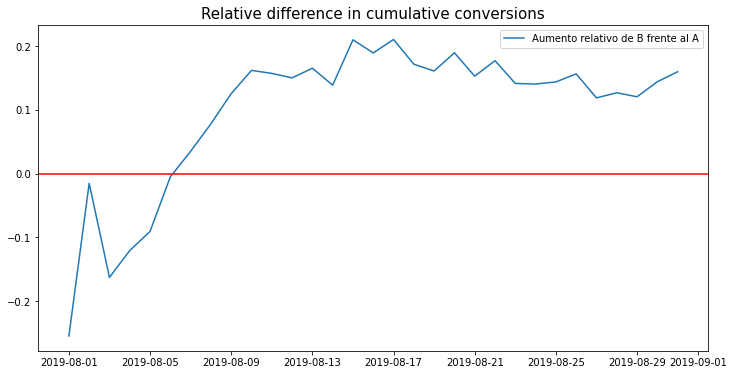

In [22]:
merged_conversions = accumulated_a[
    ['date', 'conversion']] \
 .merge(
    accumulated_b[
    ['date','conversion']], 
         left_on='date', 
         right_on='date', 
         how='left', 
         suffixes=['A', 'B']
        )

plt.figure(figsize=(12,6))
plt.plot(
    merged_conversions['date'], 
    merged_conversions['conversionB']/
    merged_conversions['conversionA']-1, 
    label="Aumento relativo de B frente al A"
)
plt.legend()
plt.title('Relative difference in cumulative conversions',fontdict={'size':15})
plt.axhline(y=0, color='red',linestyle='-');

##### Conclusiones.

En un inicio losdos grupos tenia mucha volatilidad, pero despues el grupo B tuvo un gran movimiento que no alcanzo a superarlo pero que cambio la tendencia completamente entre el A.

#### Traza un gráfico de dispersión del número de pedidos por usuario.

In [23]:
orders_per_user = orders_us.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_per_user = orders_per_user[['visitorId', 'transactionId']].rename(columns={'transactionId': 'orders'})
orders_per_user = orders_per_user.sort_values(by='orders')
orders_per_user.head()

,visitorId,orders
0,5114589,1
636,2758621772,1
637,2761566146,1
638,2763027084,1
639,2771749575,1


In [24]:
orders_per_user.describe()

,visitorId,orders
count,9.730000e+02,973.000000
mean,2.118387e+09,1.044193
std,1.221446e+09,0.238090
min,5.114589e+06,1.000000
25%,1.028756e+09,1.000000
50%,2.138109e+09,1.000000
75%,3.141508e+09,1.000000
max,4.283872e+09,3.000000


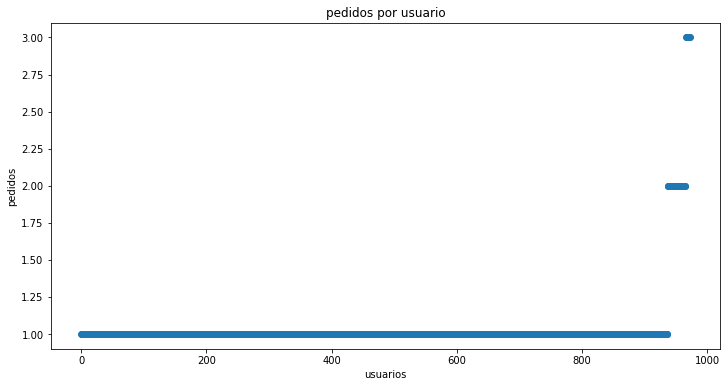

In [25]:
values = pd.Series(range(0,len(orders_per_user)))
plt.figure(figsize=(12,6))
plt.title('pedidos por usuario')
plt.xlabel('usuarios')
plt.ylabel('pedidos')
plt.scatter(values,orders_per_user['orders']);

##### Conclusión. 

Se muestra que la mayoría de los usuarios hizo 1 pedido. 
El promedio es de: 1.161009 por usuario.

De 1031: 
    25% =		1.000000
    50% =		1.000000
    75% =		1.000000

#### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [26]:
np.percentile(orders_per_user['orders'], [90, 95, 99])

array([1., 1., 2.])

##### Conclusión. 

No más del 5% hicieron más de 1 pedids y no más del 1% hicieron más de 2 pedidos.

Todo lo que supere 1 pedido es anormal.

#### Traza un gráfico de dispersión de los precios de los pedidos. 

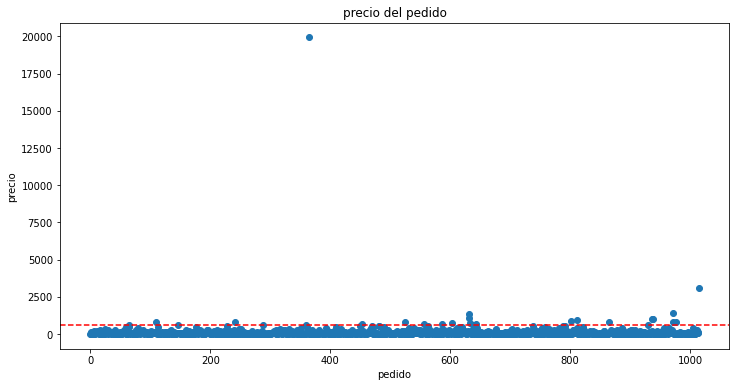

In [27]:
values = pd.Series(range(0,len(orders_us['revenue'])))
plt.figure(figsize=(12,6))
plt.title('precio del pedido')
plt.xlabel('pedido')
plt.ylabel('precio')
plt.scatter(values,orders_us['revenue']);
plt.axhline(y=603, color='red', linestyle='--');

In [28]:
orders_us['revenue'].describe()

count     1016.000000
mean       130.770866
std        648.079810
min          5.000000
25%         20.775000
50%         50.100000
75%        126.950000
max      19920.400000
Name: revenue, dtype: float64

##### Conclusión. 

Muestra que la mayoría de los pedidos son inferiores a 603 USD.

Aparecen dos valores atipicos de: 20,000 USD y 2,500 USD.

#### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [29]:
np.percentile(orders_us['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

5% de los pedidos realizados cuestan más de 414.27 USD.

1% de los pedidos tienen un precio superior a 830.3 USD.

Todo lo que supere los 414.27 USD debe considerarse anormal.

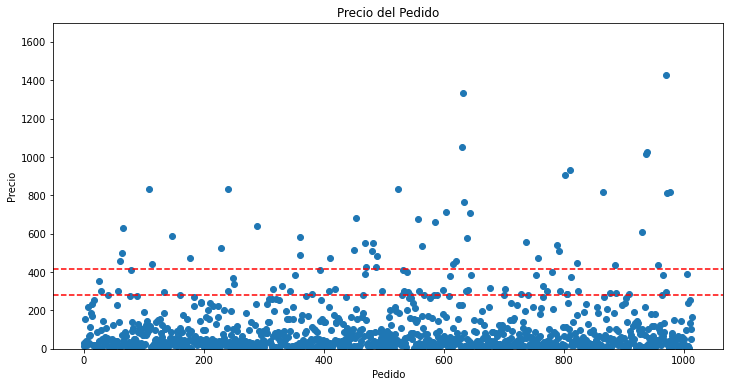

In [30]:
values = pd.Series(range(0, len(orders_us['revenue'])))
plt.figure(figsize=(12, 6))
plt.title('Precio del Pedido')
plt.xlabel('Pedido')
plt.ylabel('Precio')
plt.scatter(values, orders_us['revenue'])
plt.axhline(y=280.8, color='red', linestyle='--')
plt.axhline(y=414.275, color='red', linestyle='--')
plt.ylim(0, 1700)

plt.show()

#### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 

Crearemos las variables pedidosPorUsuarioA y pedidosPorUsuarioB para almacenar las columnas ['visitorId', 'orders'].

In [31]:
orders_a = orders_us[orders_us['group'] == 'A'] \
    .groupby('visitorId', as_index=False) \
    .agg({'transactionId': pd.Series.nunique})

orders_a.columns = ['visitorId', 'orders']

orders_b = orders_us[orders_us['group'] == 'B'] \
    .groupby('visitorId', as_index=False) \
    .agg({'transactionId': pd.Series.nunique})

orders_b.columns = ['visitorId', 'orders']

Se crean las variables sample_a y sample_b. Los usuarios que no hayan pedido nada tendrán 0.

alfa=0.05

H0="No hay diferencia significativa entre los grupos".

H1="Existe una diferencia significativa en los grupos".

In [32]:
sample_a = pd.concat([
    orders_a['orders'],
    pd.Series(0, index=np.arange(visits_us[visits_us['group'] == 'A']['visits'].sum() - len(orders_a['orders'])), name='orders')
], axis=0)

sample_b = pd.concat([
    orders_b['orders'],
    pd.Series(0, index=np.arange(visits_us[visits_us['group'] == 'B']['visits'].sum() - len(orders_b['orders'])), name='orders')
], axis=0)

In [33]:
stats.mannwhitneyu(sample_a, sample_b)[1]

0.011018084110014696

##### Conclusión.

El valor P que es mucho menor que 0,05 por lo que podemos rechazar la hipótesis nula que decía: 

"No hay diferencia significativa entre los grupos".

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. 

alfa = 0.05

H0 = "No hay diferencias significativas en el tamaño promedio de los pedidos entre los grupos".

H1 = "Existe una diferencia significativa en el tamaño promedio de los pedidos entre los grupos".

In [34]:
stats.mannwhitneyu(orders_us[orders_us['group']=='A']['revenue'], orders_us[orders_us['group']=='B']['revenue'])[1]

0.8622329690015668

##### Conclusión. 
El valor p es superior a 0,05, por lo que no podemos rechazar la hipótesis nula:

"No hay diferencias significativas en el tamaño promedio de los pedidos entre los grupos"

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

alfa = 0.05

H0 = "No hay diferencias significativas en la conversión entre los grupos utilizando los datos filtrados"

H1="Existe una diferencia significativa en la conversión entre los grupos utilizando los datos filtrados"

Filtrare los datos excluyendo a todos los usuarios que realizan más de 2 pedidos o un pedido superior a 435.54 USD.

Usaremos el criterio estadístico de Mann-Whitney a las muestras resultantes.

In [35]:
users_many_orders = pd.concat(
    [orders_a[orders_a['orders'] > 2]['visitorId'], 
     orders_b[orders_b['orders'] > 2]['visitorId']], 
    axis = 0
)
users_many_revenue = orders_us[orders_us['revenue'] > 414.275]['visitorId']

users_out_of_range = pd.concat([users_many_orders, users_many_revenue], axis = 0).drop_duplicates().sort_values()


In [36]:
sample_a_filtered = pd.concat(
    [orders_a[np.logical_not(orders_a['visitorId'] \
                  .isin(users_out_of_range))]['orders'],pd.Series
     (0, index=np.arange(visits_us[visits_us['group']=='A']['visits'] \
                  .sum() - len(orders_a['orders'])),name='orders')],axis=0)

sample_b_filtered = pd.concat(
    [orders_b[np.logical_not(orders_b['visitorId'] \
                 .isin(users_out_of_range))]['orders'],pd.Series
     (0, index=np.arange(visits_us[visits_us['group']=='B']['visits'] \
                 .sum() - len(orders_b['orders'])),name='orders')],axis=0) 

In [37]:
stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

0.01235203801772639

##### Conclusión.

El valor p es inferior a alfa, rechazamos la hipótesis nula H0.

"No hay diferencias significativas en la conversión entre los grupos utilizando los datos filtrados"

#### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

alfa = 0.05

H0 ="No hay diferencias significativas en el tamaño medio de los pedidos entre los grupos utilizando los datos filtrados"

H1 = "Existe una diferencia significativa en el tamaño medio de los pedidos entre los grupos que utilizan los datos filtrados".

In [38]:
stats.mannwhitneyu(
    orders_us[np.logical_and(
        orders_us['group']=='A',
        np.logical_not(orders_us['visitorId'].isin(users_out_of_range)))]['revenue'],
    orders_us[np.logical_and(
        orders_us['group']=='B',
        np.logical_not(orders_us['visitorId'].isin(users_out_of_range)))]['revenue'])[1]

0.6802866355131224

##### Conclusión.

El valor p es mayor a alfa. No podemos concluir que existe una diferencia significativa.

#### Toma una decisión basada en los resultados de la prueba. 

Las decisiones posibles son: 
1. Para la prueba, considera a uno de los grupos como líder. 
2. Para la prueba, concluye que no hay diferencia entre los grupos. 
3. Continúa la prueba.


##### Conclusion.

Teniendo en cuenta el análisis anterior. Podemos detener la prueba diciendo que el grupo B es el ganador.